### 回帰の例を実装
Pythonでバックプロパゲーションを実装します。  
今回の目的は、バックプロパゲーションによりネットワークが学習する仕組みを理解することなので、ニューロンや層の数が多くないシンプルなニューラルネットワークを構築します。  

### バックプロパゲーションの実装
以下は、バックプロパゲーションの全体のコードです。

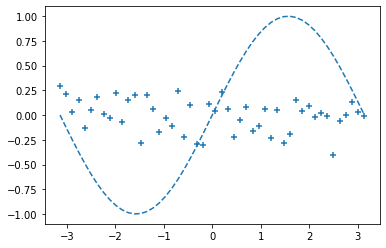

Epoch :0/2001 Error:0.2802603055004136


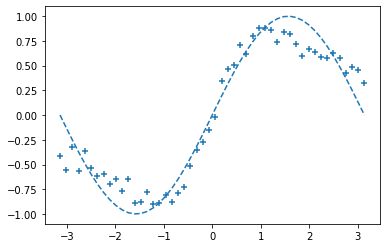

Epoch :100/2001 Error:0.017135783501134413


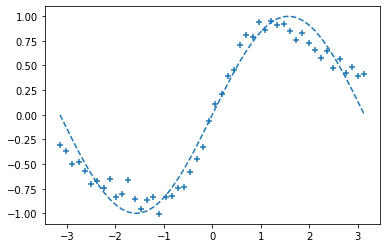

Epoch :200/2001 Error:0.012107465772040542


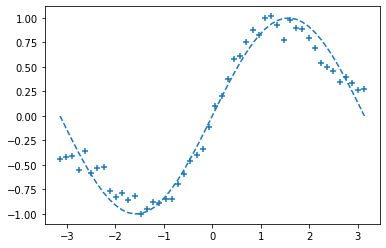

Epoch :300/2001 Error:0.01010574568949016


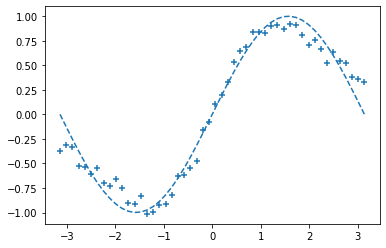

Epoch :400/2001 Error:0.008596759243677846


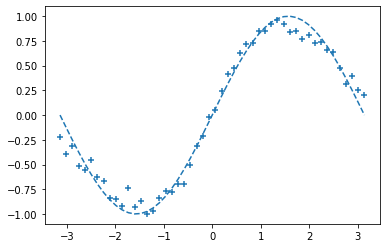

Epoch :500/2001 Error:0.005473096209493943


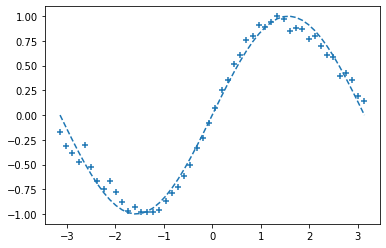

Epoch :600/2001 Error:0.004014820102234718


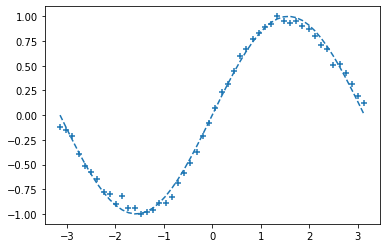

Epoch :700/2001 Error:0.0013596537719182341


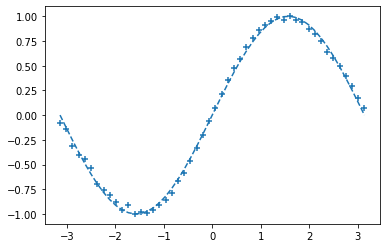

Epoch :800/2001 Error:0.0006635323166486612


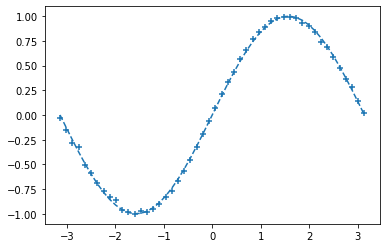

Epoch :900/2001 Error:0.00021649107943033134


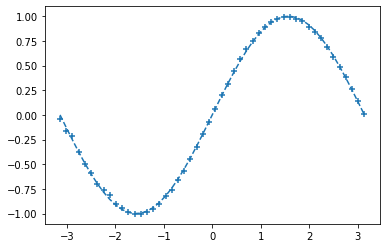

Epoch :1000/2001 Error:0.00011328390712611295


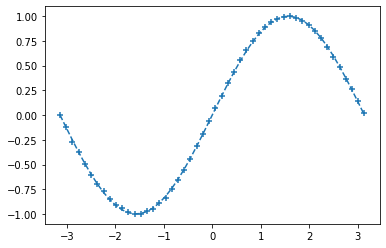

Epoch :1100/2001 Error:3.4830707924206205e-05


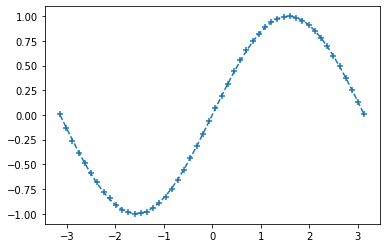

Epoch :1200/2001 Error:1.5742638097501296e-05


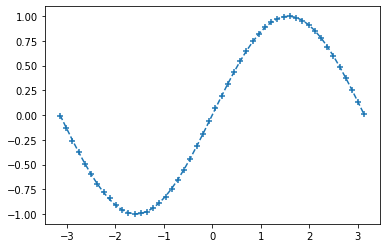

Epoch :1300/2001 Error:9.535830794956826e-06


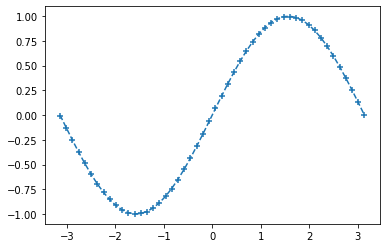

Epoch :1400/2001 Error:5.303939964195252e-06


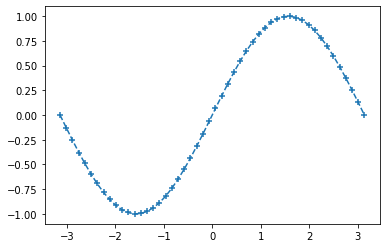

Epoch :1500/2001 Error:2.686076719680287e-06


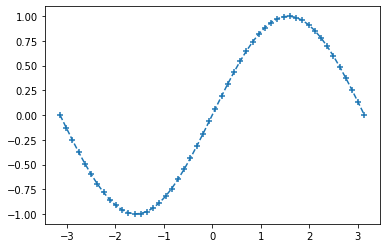

Epoch :1600/2001 Error:1.6216971789946843e-06


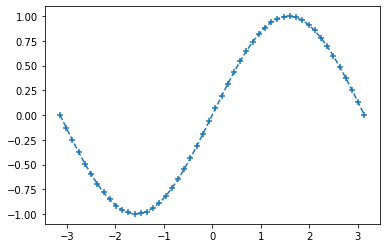

Epoch :1700/2001 Error:1.1223118569224778e-06


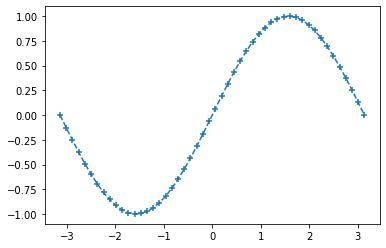

Epoch :1800/2001 Error:9.536787009383277e-07


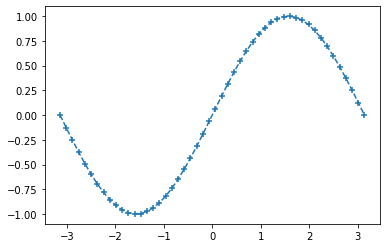

Epoch :1900/2001 Error:7.654804795580893e-07


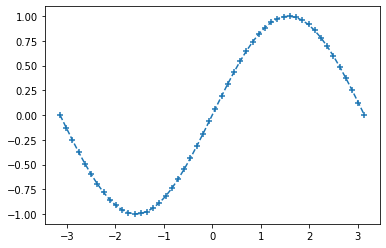

Epoch :2000/2001 Error:8.307972740670824e-07


In [13]:
import numpy as np
import matplotlib.pyplot as plt

# __ 入力と正解の用意 __
# 入力
input_data = np.linspace(-np.pi, np.pi)
# 正解
correct_data = np.sin(input_data)
# データ数
n_data = len(correct_data)

# __ 各設定 __
n_in = 1 # 入力層のニューロン数
n_mid = 3 # 中間層のニューロン数
n_out = 1 # 出力層のニューロン数

wb_width = 0.01 # 重みとバイアスの広がり具合
eta = 0.1 # 学習係数
epoch = 2001# 全てのデータを使い切る回数2001
interval = 100 # 経過の表示感覚

# __ 中間層 __
class MiddleLayer:
    def __init__(self, n_upper, n): #初期設定
        self.w = wb_width * np.random.randn(n_upper, n) # 重み（行列）
        self.b = wb_width * np.random.randn(n) # バイアス
        
    def forward(self, x): # 順伝播
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = 1/(1+np.exp(-u)) # シグモイド関数
    
    def backward(self, grad_y):
        delta = grad_y * (1 - self.y)*self.y #　シグモイド関数の微分
        
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        
        self.grad_x = np.dot(delta, self.w.T)
        
    def update(self, eta): # 重みとバイアスの更新
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b
        
# __ 出力層 __
class OutputLayer: # 順伝播
    def __init__(self, n_upper, n): # 初期設定
        self.w = wb_width * np.random.randn(n_upper, n) # 重み（行列）
        self.b = wb_width * np.random.randn(n) # バイアス（ベクトル）
        
    def forward(self, x): # 順伝播
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = u # 恒等関数
        
    def backward(self, t): # 逆伝播
        delta = self.y - t
        
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        
        self.grad_x = np.dot(delta, self.w.T)
        
    def update(self, eta): # 重みとバイアスの更新
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b
        
# -- 各層の初期化 -- 
middle_layer = MiddleLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)
    
# -- 学習 --
for i in range(epoch):
    
    # インデックスをシャッフル(n_dataとは？)
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)
    
    # 結果の表示用
    total_error = 0
    # その時点でのx座標
    plot_x = []
    # その時点でのy座標
    plot_y = []
    
    for idx in index_random:
        # idxにはランダムなインデックスが入っている
        
        x = input_data[idx:idx+1] # 入力
        t = correct_data[idx:idx+1] # 正解
        
        # 順伝播(中間→出力)
        middle_layer.forward(x.reshape(1, 1)) # 入力を行列に変換
        output_layer.forward(middle_layer.y)
        
        # 逆伝播（出力→中間）
        output_layer.backward(t.reshape(1, 1)) # 正解を行列に変換
        middle_layer.backward(output_layer.grad_x)
        
        #　重みとバイアスの更新
        middle_layer.update(eta)
        output_layer.update(eta)
        
        #  インターバルの感覚で、誤差の計算・出力の記録を行う
        if i%interval == 0:
            
            y = output_layer.y.reshape(-1) # 行列ベクトルに戻す
            # 誤差の計算
            total_error += 1.0/2.0*np.sum(np.square(y - t)) # 二乗和誤差
            
            # 出力の記録
            plot_x.append(x)
            plot_y.append(y)
        
    if i%interval == 0:
        
        # 出力のグラフ表示
        plt.plot(input_data, correct_data, linestyle="dashed")
        plt.scatter(plot_x, plot_y, marker="+")
        plt.show()
        
        # エボック数と誤差の表示
        print("Epoch :" + str(i) + "/" + str(epoch), "Error:" + str(total_error/n_data))

割とやるたびに結果変わるっぽい  
このようなシンプルなケースではニューロン数をあまり必要としませんでしたが、より複雑な事象をニューラルネットワークで捉えるためには、ニューロン数及び層の数を増やしていく必要があります。   